INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 2, 'problem': 'BentCigar', 'problem_size': 150, 'communication_type': 'temp2', 'communication_operator': 'swap', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 1500005it [05:58, 4188.06it/s]                             
INFO:root:Socjo finished in 39.827205590407054
Progress: 1500005it [02:41, 9264.95it/s]                             
INFO:root:comparison finished in 35.34855722983678
INFO:root:best socjo 670.0266087300813 best single 589.8589970361326


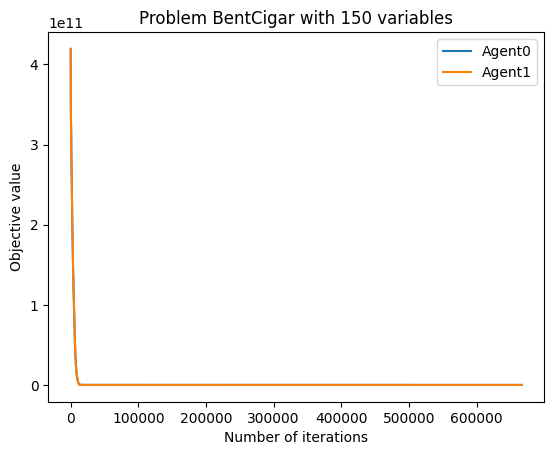

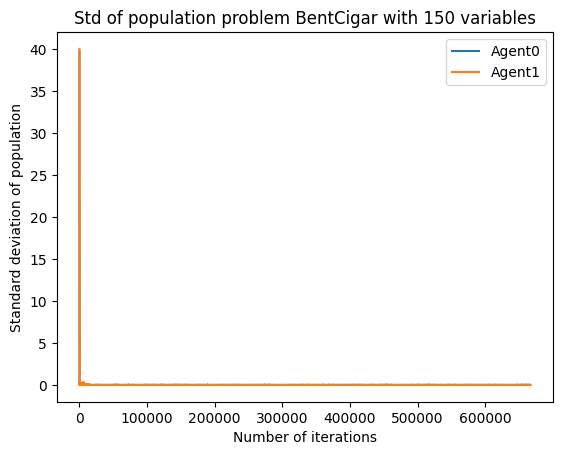

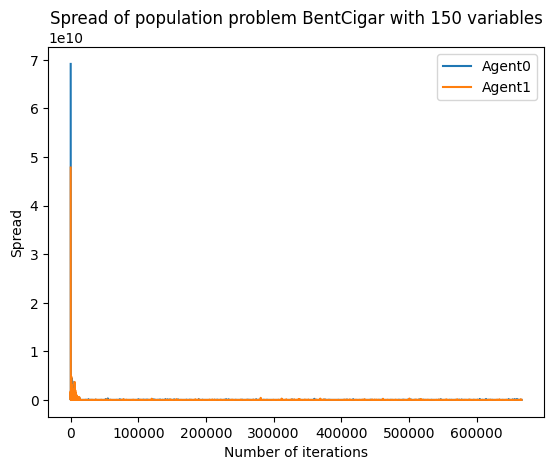

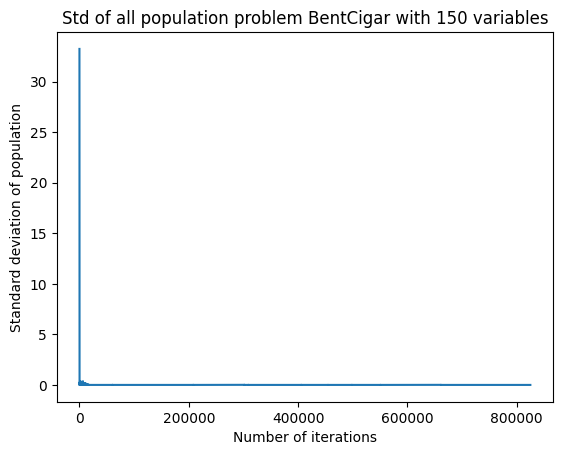

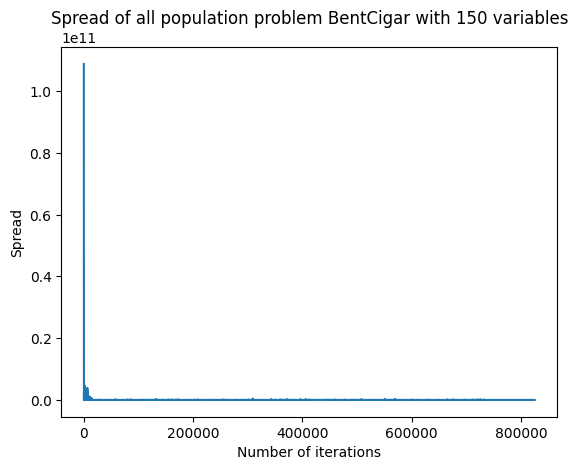

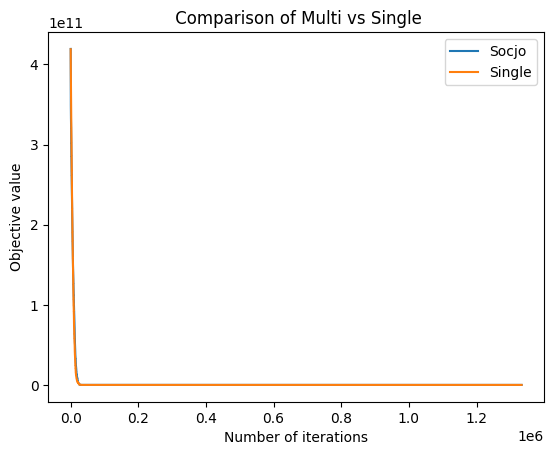

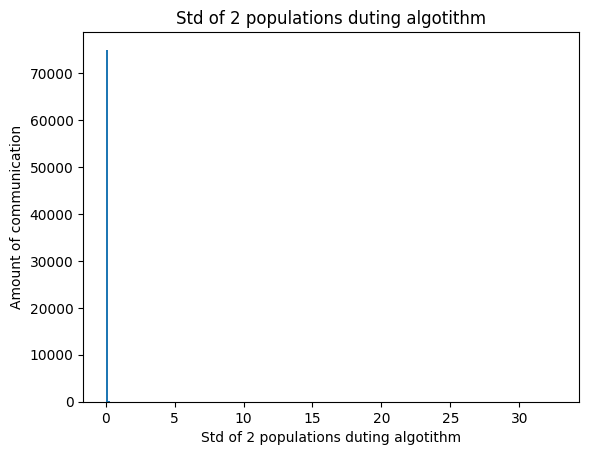

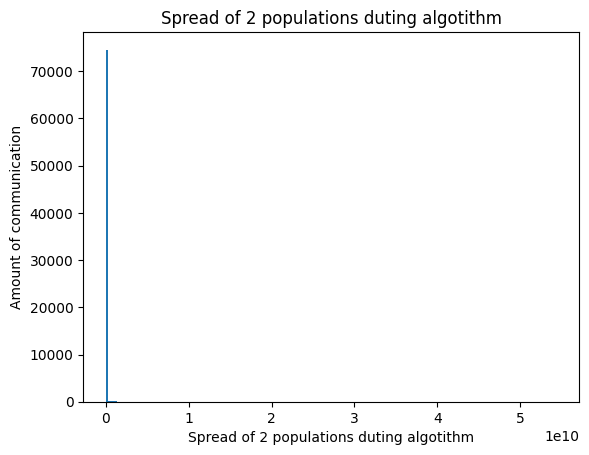

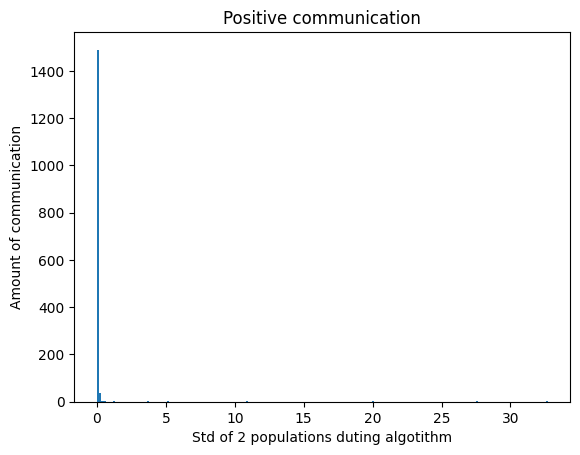

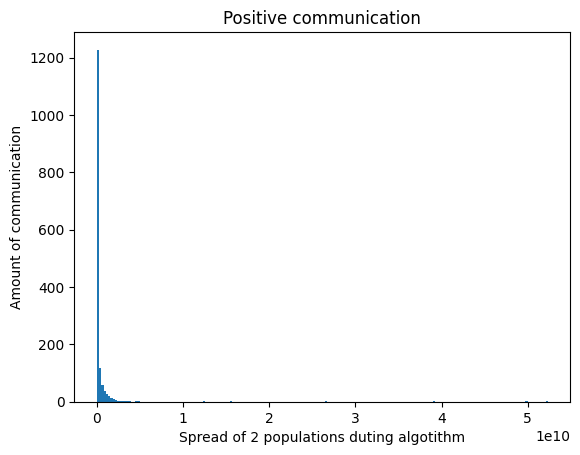

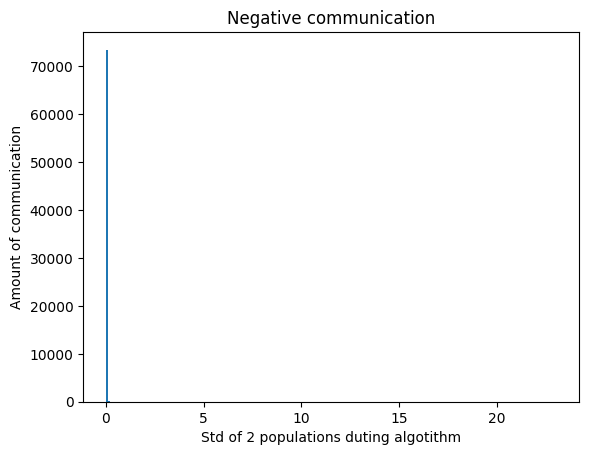

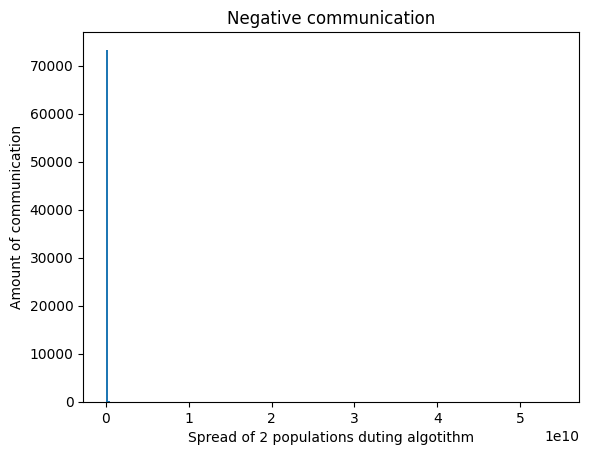

INFO:root:plotting finished in 0.17150038083394367
INFO:root:Run 0 out of 2
INFO:root:Socjo started


In [1]:
import logging

from inicialization.agents_inicialization import create_agents_float_solution
from settings import Settings
from runners.single import MultiAgentRunner
from runners.statistic import StatisticRunner 
from time import time
NUM_OF_COMM = 1
time1 =  time()
Statistic_runner_list = []
for idx, config in enumerate(["config_B.json","config_D.json"]):#, "config_A.json"]):
    with open(config,"r") as f:
        settings = Settings(f)
        # logging.basicConfig(level=settings.log_level)
    logging.basicConfig(level=logging.INFO)
    logging.info(settings.json_settings)
    config = settings.decodeAgentsData()
    iterations = config.problem.number_of_variables *100 * 10 
    Agents, Agent_Reference = create_agents_float_solution(config)     
    runner = MultiAgentRunner(agents= Agents, agent_single= Agent_Reference, max_iterations=iterations)
    Statistic_runner_list.append(StatisticRunner(runner))
    Statistic_runner_list[idx].run_an_collect_data(no_runs = 2, cycles=int(iterations/10/config.noAgents) , cycle_iter=10, num_of_comm=NUM_OF_COMM)
    if settings.enable_plots:
        Statistic_runner_list[idx].plot()
    #Statistic_runner_list[idx].save_progres(config = config, num_of_comm  =NUM_OF_COMM )

In [ ]:
import logging

from inicialization.agents_inicialization import create_agents_float_solution
from settings import Settings
from runners.single import MultiAgentRunner
from runners.statistic import StatisticRunner 
from time import time
NUM_OF_COMM = 1
time1 =  time()
Statistic_runner_list = []
for idx, config in enumerate(["config_B.json","config_D.json"]):#, "config_A.json"]):
    with open(config,"r") as f:
        settings = Settings(f)
        # logging.basicConfig(level=settings.log_level)
    logging.basicConfig(level=logging.INFO)
    logging.info(settings.json_settings)
    config = settings.decodeAgentsData()
    config.noAgents = 5
    iterations = config.problem.number_of_variables *100 * 100 
    Agents, Agent_Reference = create_agents_float_solution(config)     
    runner = MultiAgentRunner(agents= Agents, agent_single= Agent_Reference, max_iterations=iterations)
    Statistic_runner_list.append(StatisticRunner(runner))
    Statistic_runner_list[idx].run_an_collect_data(no_runs = 2, cycles=int(iterations/10/config.noAgents) , cycle_iter=10, num_of_comm=NUM_OF_COMM)
    if settings.enable_plots:
        Statistic_runner_list[idx].plot()
    #Statistic_runner_list[idx].save_progres(config = config, num_of_comm  =NUM_OF_COMM )

In [ ]:
for el in Statistic_runner_list:   
    for i in range (0, len(el.Executor.comunication_history)//1000):

        lista1 = list(filter(lambda hist: hist.result == True, el.Executor.comunication_history[i*1000:(i+1)*1000]))
        lista2 = list(filter(lambda hist: hist.result == False, el.Executor.comunication_history[i*1000:(i+1)*1000]))
        print(f"{i*1000} - {(i+1)*1000} nr komunikacji pozytywna {lista1.__len__()} negatyna {lista2.__len__()}")
